In [3]:
!source ./bin/activate

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

ModuleNotFoundError: No module named 'pandas'

In [6]:
quakes = pd.read_csv("https://delvex-software-center.s3.ap-south-1.amazonaws.com/USGS/all_month.csv")

In [7]:
quakes.info()
quakes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9593 entries, 0 to 9592
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9593 non-null   object 
 1   latitude         9593 non-null   float64
 2   longitude        9593 non-null   float64
 3   depth            9593 non-null   float64
 4   mag              9592 non-null   float64
 5   magType          9592 non-null   object 
 6   nst              8018 non-null   float64
 7   gap              8018 non-null   float64
 8   dmin             8017 non-null   float64
 9   rms              9592 non-null   float64
 10  net              9593 non-null   object 
 11  id               9593 non-null   object 
 12  updated          9593 non-null   object 
 13  place            9593 non-null   object 
 14  type             9593 non-null   object 
 15  horizontalError  7317 non-null   float64
 16  depthError       9592 non-null   float64
 17  magError      

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-04-03T03:16:50.230Z,38.840668,-122.834335,1.32,0.53,md,6.0,122.0,0.002262,0.01,...,2025-04-03T03:18:28.928Z,"10 km NNW of The Geysers, CA",earthquake,0.61,1.23,0.310,9.0,automatic,nc,nc
1,2025-04-03T03:08:03.540Z,61.556800,-141.271600,13.40,1.20,ml,NaN,NaN,NaN,0.20,...,2025-04-03T03:10:11.692Z,"88 km E of McCarthy, Alaska",earthquake,NaN,0.40,NaN,NaN,automatic,ak,ak
2,2025-04-03T02:59:56.724Z,61.789200,-149.608200,38.70,1.20,ml,NaN,NaN,NaN,0.53,...,2025-04-03T03:01:20.110Z,"18 km N of Meadow Lakes, Alaska",earthquake,NaN,1.00,NaN,NaN,automatic,ak,ak
3,2025-04-03T02:54:35.248Z,60.081400,-152.528700,97.80,1.40,ml,NaN,NaN,NaN,0.46,...,2025-04-03T02:57:27.690Z,"46 km WNW of Happy Valley, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak
4,2025-04-03T02:41:42.280Z,35.639833,-117.548500,8.08,0.89,ml,19.0,63.0,0.092800,0.13,...,2025-04-03T02:45:07.322Z,"12 km E of Ridgecrest, CA",earthquake,0.21,0.86,0.161,16.0,automatic,ci,ci


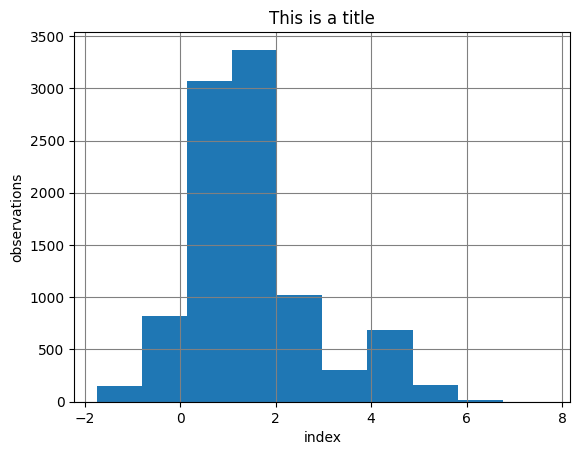

In [8]:
plt.xlabel("index")
plt.ylabel("observations")
plt.title("This is a title")
plt.hist(quakes.mag)
plt.grid(color="grey")
plt.show()

In [9]:
#define features/labels

features = ["latitude", "longitude","depth"]
label = "mag"

In [10]:
# data preprocessing
quakes = quakes.dropna(subset=[label]) #drop NAs in label variable (mag)
for col in features: #use a for loop to treat each col in features
    quakes[col] = quakes[col].fillna(quakes[col].median()) #replace NA with median values

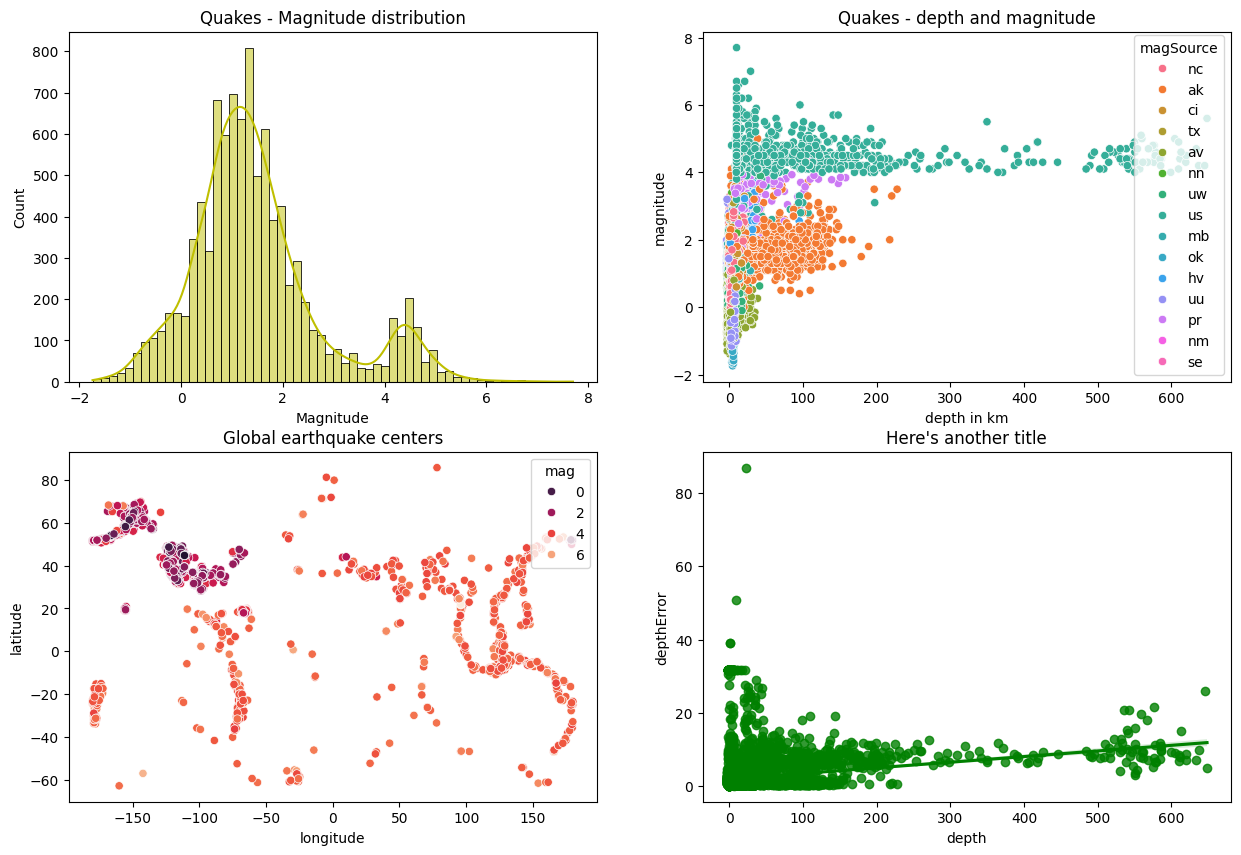

In [11]:
plt.figure(figsize=(15,10))

#subplot 1
plt.subplot(2,2,1)
plt.title("Quakes - Magnitude distribution")
plt.xlabel("Magnitude")
sb.histplot(quakes[label], kde=True, bins = 60, color = "y")

#second plot
plt.subplot(2,2,2)
plt.title("Quakes - depth and magnitude")
plt.xlabel("depth in km")
plt.ylabel("magnitude")
sb.move_legend(sb.scatterplot(x="depth", y=label, data=quakes, hue = "magSource"), "lower right")

#another plot!
plt.subplot(2,2,3)
plt.title("Global earthquake centers")
sp = sb.scatterplot(x="longitude", y="latitude", hue = label, data = quakes, palette = "rocket")
sb.move_legend(sp, "upper right")

#another plot!
plt.subplot(2,2,4)
sb.regplot(x= "depth", y="depthError", data=quakes, color = "green")
plt.title("Here's another title")

plt.show()


In [12]:
print(quakes["mag"].median()) #how to access  median for particular column
print(quakes["depth"][500:550]) #access particular entries

1.29
500     13.1000
501      0.9521
502      9.9200
503      4.4000
504     16.8000
505     -0.1300
506      3.3700
507      6.2000
508     30.2000
509     17.5000
510     10.0000
511      3.1000
512      4.6800
513      2.4700
514      8.9000
515      5.2000
516      2.5700
517     11.4000
518      4.9800
519      3.0400
520     30.2000
521      3.3300
522     54.9000
523      2.3600
524      8.6200
525      3.2900
526      2.7673
527      0.0000
528     10.0400
529     35.4000
530     49.8000
531      7.1765
532     10.9000
533      8.8600
534      6.0000
535      3.0900
536      1.6300
537    391.0560
538      7.6200
539     17.9530
540      9.5100
541     97.8050
542    129.3000
543     28.8000
544     15.2000
545      6.6000
546      3.1600
547     84.4000
548     10.8700
549     12.2200
Name: depth, dtype: float64


In [13]:
#split features and labels

feature_data=quakes[features]
label_data = quakes[label] 
print(feature_data)


       latitude   longitude  depth
0     38.840668 -122.834335   1.32
1     61.556800 -141.271600  13.40
2     61.789200 -149.608200  38.70
3     60.081400 -152.528700  97.80
4     35.639833 -117.548500   8.08
...         ...         ...    ...
9588  44.739000 -111.123333   7.15
9589  37.428500 -119.018500   3.69
9590  44.726000 -111.120667   2.38
9591 -57.288500  147.327500  10.00
9592  39.360500 -111.194500  -0.61

[9592 rows x 3 columns]


In [14]:
train_ft,test_ft,train_lb,test_lb=train_test_split(feature_data,label_data,test_size=0.2,random_state=100) #random state specifies starting integer for random seed

In [18]:
model = RandomForestRegressor()

In [19]:
trained_model = model.fit(train_ft, train_lb)

In [22]:
predicted_mag = trained_model.predict(test_ft)
print(predicted_mag)

[0.9866 1.5696 0.0358 ... 1.611  1.21   0.943 ]


In [ ]:
print(test_lb)

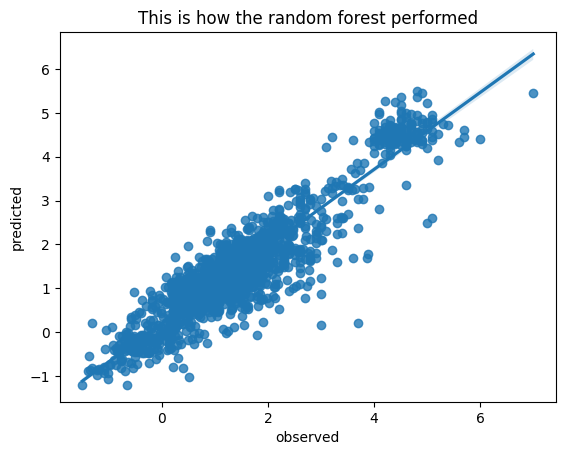

In [53]:
sb.regplot(x=test_lb, y=predicted_mag)
plt.xlabel("observed")
plt.ylabel("predicted")
plt.title("This is how the random forest performed")
plt.show()

In [74]:
#also available: absolute error, MSE, RMSE, R2
print(mean_absolute_error(test_lb, predicted_mag))
print(mean_squared_error(test_lb, predicted_mag))
print(r2_score(test_lb, predicted_mag))
print(root_mean_squared_error(test_lb, predicted_mag))

0.3566820913625499
0.23849489576586005
0.8497417306136625
0.48835939201151857


0.3566820913625499